In [42]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
sentences = pd.read_csv('sentences.csv')

sentences.head()

,label,sentence,author,word_count,mean_word_length,stop_words_ratio,stop_words_count,ADJ_count,ADV_count,ADP_count,...,X_count,INTJ_count,CONJ_count,CCONJ_count,SCONJ_count,PROPN_count,NOUN_count,PRON_count,PART_count,VERB_count
0,0,We may call the faculty of cognition from prin...,Kant,64,5.20,56.25,36,6,2,11,...,1,0,0,2,3,0,17,3,1,7
1,0,That goes merely into our faculty of knowing t...,Kant,82,5.13,57.32,47,5,4,14,...,3,0,0,6,2,3,17,4,0,9
2,0,"The Critique, then, which sifts them all, as r...",Kant,50,4.84,62.00,31,4,1,6,...,1,0,0,1,3,1,10,3,1,6
3,0,It relegates all other pure concepts under Ide...,Kant,27,5.26,62.96,17,5,1,4,...,0,0,0,2,0,1,3,1,2,2
4,0,For they serve as regulative principles; partl...,Kant,63,5.03,61.90,39,4,5,11,...,0,0,0,2,4,0,12,4,3,8


In [52]:
sentences.shape

(107134, 23)

In [53]:
sentences.columns

Index(['label', 'sentence', 'author', 'word_count', 'mean_word_length',
       'stop_words_ratio', 'stop_words_count', 'ADJ_count', 'ADV_count',
       'ADP_count', 'AUX_count', 'DET_count', 'NUM_count', 'X_count',
       'INTJ_count', 'CONJ_count', 'CCONJ_count', 'SCONJ_count', 'PROPN_count',
       'NOUN_count', 'PRON_count', 'PART_count', 'VERB_count'],
      dtype='object')

In [59]:
col_list = sentences.columns[5:]
for col in col_list:
    sentences[col] = sentences[col]/sentences['word_count']

In [60]:
sentences.head()

,label,sentence,author,word_count,mean_word_length,stop_words_ratio,stop_words_count,ADJ_count,ADV_count,ADP_count,...,X_count,INTJ_count,CONJ_count,CCONJ_count,SCONJ_count,PROPN_count,NOUN_count,PRON_count,PART_count,VERB_count
0,0,We may call the faculty of cognition from prin...,Kant,64,5.20,0.878906,0.562500,0.093750,0.031250,0.171875,...,0.015625,0.0,0.0,0.031250,0.046875,0.000000,0.265625,0.046875,0.015625,0.109375
1,0,That goes merely into our faculty of knowing t...,Kant,82,5.13,0.699024,0.573171,0.060976,0.048780,0.170732,...,0.036585,0.0,0.0,0.073171,0.024390,0.036585,0.207317,0.048780,0.000000,0.109756
2,0,"The Critique, then, which sifts them all, as r...",Kant,50,4.84,1.240000,0.620000,0.080000,0.020000,0.120000,...,0.020000,0.0,0.0,0.020000,0.060000,0.020000,0.200000,0.060000,0.020000,0.120000
3,0,It relegates all other pure concepts under Ide...,Kant,27,5.26,2.331852,0.629630,0.185185,0.037037,0.148148,...,0.000000,0.0,0.0,0.074074,0.000000,0.037037,0.111111,0.037037,0.074074,0.074074
4,0,For they serve as regulative principles; partl...,Kant,63,5.03,0.982540,0.619048,0.063492,0.079365,0.174603,...,0.000000,0.0,0.0,0.031746,0.063492,0.000000,0.190476,0.063492,0.047619,0.126984


In [65]:
sentences.groupby('author')['word_count'].mean()
#sentences.hist(column='word_count', by='author', sharey=True)
#plt.show()

author
Aristotle    31.222615
Hume         34.650018
Kant         35.708760
Nietzsche    26.969659
Plato        28.129983
Name: word_count, dtype: float64

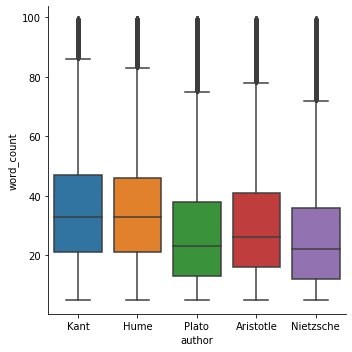

In [66]:
sns.catplot(y='word_count', x='author', data=sentences, kind='box')

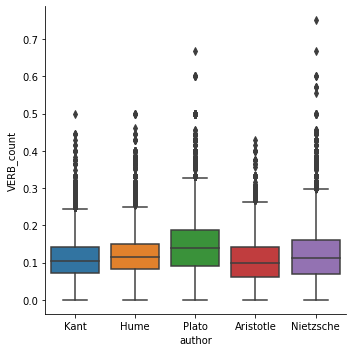

In [68]:
sns.catplot(y='VERB_count', x='author', data=sentences, kind='box')

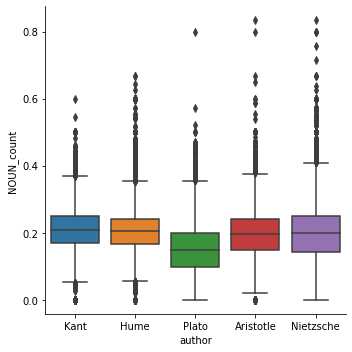

In [67]:
sns.catplot(y='NOUN_count', x='author', data=sentences, kind='box')

In [49]:
sentences_cl = sentences.drop(columns = sentences.columns[3:])
sentences_cl = sentences_cl.drop('label', axis=1)
sentences_cl.head()

,sentence,author
0,We may call the faculty of cognition from prin...,Kant
1,That goes merely into our faculty of knowing t...,Kant
2,"The Critique, then, which sifts them all, as r...",Kant
3,It relegates all other pure concepts under Ide...,Kant
4,For they serve as regulative principles; partl...,Kant


In [50]:
sentences_cl.shape

(107134, 2)

In [22]:
sentences_cl.author.unique()

array(['Kant', 'Hume', 'Plato', 'Aristotle', 'Nietzsche'], dtype=object)

In [46]:
sentences_cl = sentences_cl.sample(frac=1).reset_index(drop=True)

In [47]:
sentences_cl.head(20)

,sentence,author
0,The second commonplace invoked even by those w...,Kant
1,This list is certainly not complete; it is obv...,Nietzsche
2,"Yes, Cleitophon, but he also said that justice...",Plato
3,"But then, do we admit into our state the comic...",Plato
4,"Pigeons draw up their tail, geese go and bathe.",Aristotle
5,Private property seems to me almost as secure ...,Hume
6,People have ascribed the origin of the idea of...,Nietzsche
7,And wherever these distinct interests sensibly...,Hume
8,But if he were taken back again he would imagi...,Plato
9,"However small the hopes of success, a new par...",Hume


In [48]:
sentences_cl.shape

(107134, 2)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences_cl.sentence, sentences_cl.author, random_state=1, test_size = 0.3)

In [24]:
from gensim.utils import tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    tokens = list(tokenize(text))
    #res = ' '.join([stemmer.stem(t.lower()) for t in tokens if t.lower() not in stop_words]) 
    res = ' '.join([lemmatizer.lemmatize(t.lower()) for t in tokens if t.lower() not in stop_words]) 
    if len(res) == 0:
        return ' '
    else:
        return res

[nltk_data] Downloading package punkt to /Users/Greg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Greg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer(preprocessor=clean_text, ngram_range=(1,2)) 
count_vect.fit(X_train) 

CountVectorizer(ngram_range=(1, 2),
                preprocessor=<function clean_text at 0x7fa8122e21f0>)

In [26]:
X_train_mat = count_vect.transform(X_train)

In [27]:
X_test_mat = count_vect.transform(X_test)

In [28]:
from sklearn.naive_bayes import MultinomialNB
cl = MultinomialNB()

In [29]:
cl.fit(X_train_mat,y_train)

MultinomialNB()

In [30]:
y_pred = cl.predict(X_test_mat)
y_pred

array(['Nietzsche', 'Kant', 'Nietzsche', ..., 'Kant', 'Nietzsche', 'Hume'],
      dtype='<U9')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Aristotle       0.95      0.50      0.66      2965
        Hume       0.81      0.98      0.88     13665
        Kant       0.88      0.78      0.83      3968
   Nietzsche       0.91      0.77      0.83      5508
       Plato       0.84      0.81      0.82      6035

    accuracy                           0.84     32141
   macro avg       0.88      0.77      0.80     32141
weighted avg       0.85      0.84      0.84     32141



## Sentiment Analysis

In [32]:
from transformers import pipeline

In [33]:
sentiment_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

2023-02-06 19:34:42.758319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [41]:
for sent in sentences_cl.sentence:
    sentimenter = sentiment_classifier(sent)

KeyboardInterrupt: 

In [ ]:
sentimenter